# Recurrent Neural Networks

Listing 6.19 Pseudocode RNN

In [ ]:
state_t = 0 #The state at t
for input_t in input_sequence:  #Iterates over sequence elements
    output_t = f(input_t, state_t)
    state_t = output_t #The previous output becomes the state for the next iteration.

Listing 6.20 More detailed pseudocode for the RNN

In [ ]:
state_t = 0
for input_t in input_sequence:
    output_t = activation(dot(W, input_t) + dot(U, state_t) + b)
    state_t = output_t

Listing 6.21 Numpy implementation of a simple RNN

In [ ]:
import numpy as np
timesteps = 100 #Number of timesteps in the input sequence
input_features = 32 #Dimensionality of the input feature space
output_features = 64 #Dimensionality of the output feature space
inputs = np.random.random((timesteps, input_features)) #Input data: random noise for the sake of the example
state_t = np.zeros((output_features,)) #Initial state: an all-zero vector

W = np.random.random((output_features, input_features)) #Creates random weight matrices
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,))

successive_outputs = []
for input_t in inputs: #input_t is a vector of shape (input_features,).
    output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b) #Combines the input with the current state 
                                                                    #(the previous output) to obtain the current output
    successive_outputs.append(output_t) #Stores this output in a list
    state_t = output_t #Updates the state of the network for the next timestep
    final_output_sequence = np.concatenate(successive_outputs, axis=0) #The final output is a 2D tensor of 
                                                                       #shape (timesteps, output_features).

A recurrent layer in Keras

In [9]:
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [10]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [11]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32)) #Last layer only returns the last output
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


Listing 6.22 Preparing the IMDB data

In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
max_features = 5000 #Number of words to consider as features
maxlen = 300 #Cuts off texts after this many words (among the max_features most common words)
batch_size = 32
print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')
print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
17465344/17464789 [==============================] - 0s 0us/step
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 300)
input_test shape: (25000, 300)


Listing 6.23 Training the model with Embedding and SimpleRNN layers

In [2]:
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

In [6]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [7]:
history = model.fit(input_train, y_train,epochs=10,batch_size=128,validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 47s 301ms/step - loss: 0.3722 - acc: 0.8439 - val_loss: 0.4221 - val_acc: 0.8128
Epoch 2/10
157/157 [==============================] - 47s 299ms/step - loss: 0.2950 - acc: 0.8816 - val_loss: 0.3874 - val_acc: 0.8362
Epoch 3/10
157/157 [==============================] - 47s 299ms/step - loss: 0.2269 - acc: 0.9110 - val_loss: 0.3756 - val_acc: 0.8518
Epoch 4/10
157/157 [==============================] - 47s 298ms/step - loss: 0.1715 - acc: 0.9365 - val_loss: 0.4102 - val_acc: 0.8502
Epoch 5/10
157/157 [==============================] - 46s 296ms/step - loss: 0.1168 - acc: 0.9610 - val_loss: 0.5341 - val_acc: 0.8030
Epoch 6/10
157/157 [==============================] - 46s 295ms/step - loss: 0.0748 - acc: 0.9762 - val_loss: 0.5868 - val_acc: 0.7964
Epoch 7/10
157/157 [==============================] - 46s 293ms/step - loss: 0.0554 - acc: 0.9828 - val_loss: 0.6642 - val_acc: 0.7816
Epoch 8/10
157/157 [==============================] - 4

Listing 6.24 Plotting results

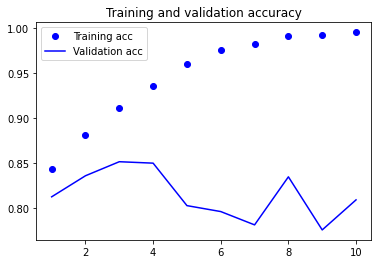

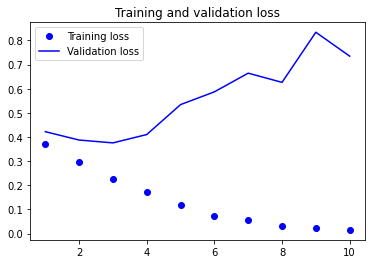

In [8]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()